In [4]:
salary=[11,40,45,68,65,68,78,90,57,74,91,92,88,68,57,48,99,101,68,77,110,100,140]

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [6]:
#five point summary

In [7]:
np.quantile(salary,[0,0.25,.50,.75,1])

array([ 11. ,  61. ,  74. ,  91.5, 140. ])

In [8]:
df=pd.DataFrame(salary,columns=['salary'])

In [10]:
df.describe()

,salary
count,23.000000
mean,75.434783
std,27.110592
min,11.000000
25%,61.000000
50%,74.000000
75%,91.500000
max,140.000000


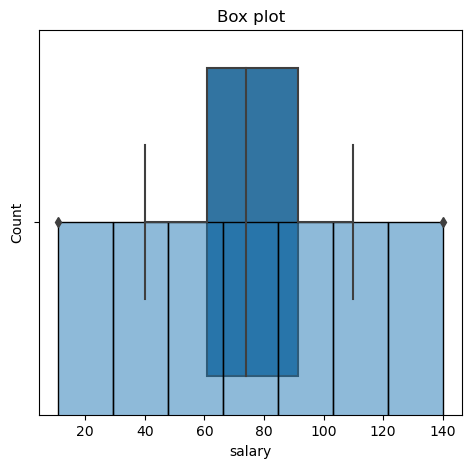

In [11]:
# To check outlietrs >> distplot,boxplot




plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['salary'],kde=True)
plt.title("Dist plot")



plt.subplot(1,2,1)
sns.boxplot(data=df,x='salary')
plt.title("Box plot")
plt.show()

In [12]:
# dropping the outlier
#capping the outlier
#replace with mean and median
#scaling and transformation

In [13]:
Q1=df['salary'].quantile(0.25)
Q3=df['salary'].quantile(0.75)

In [14]:
Q1

61.0

In [15]:
Q3

91.5

In [16]:
IQR=Q3-Q1

In [17]:
IQR

30.5

In [18]:
lower_fence=Q1+1.5*IQR
upper_fence=Q3+1.5*IQR

In [19]:
lower_fence

106.75

In [20]:
upper_fence

137.25

In [21]:
df.shape

(23, 1)

In [22]:
# dropping the outlier

In [23]:
df_filtered=df[(df.salary >= lower_fence) & (df.salary <= upper_fence)]
df_filtered.shape

(1, 1)

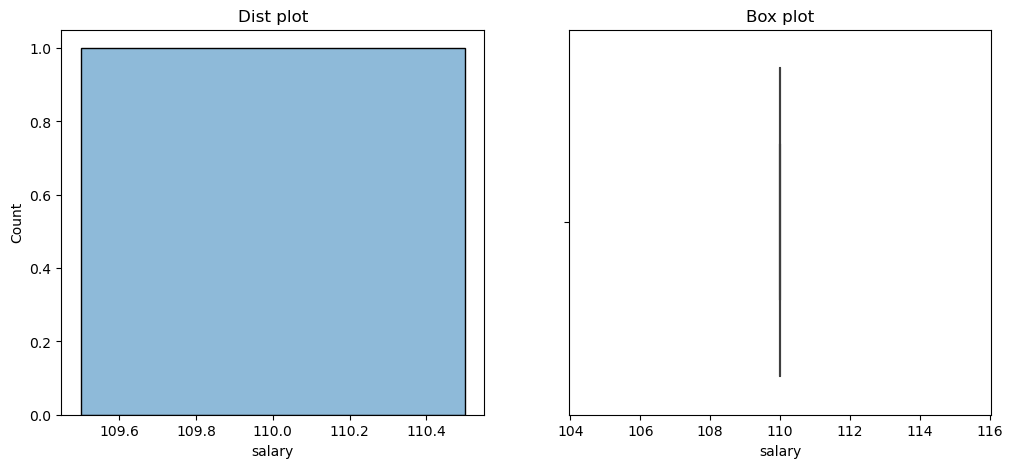

In [24]:

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df_filtered['salary'],kde=True)
plt.title("Dist plot")



plt.subplot(1,2,2)
sns.boxplot(data=df_filtered,x='salary')
plt.title("Box plot")
plt.show()

In [46]:
# replace the outliers with mean and median

In [25]:
df['salary_mean_imputed']=np.where((df.salary>=upper_fence) | (df.salary <= lower_fence),df['salary'].mean(),df['salary'])

In [26]:
df

,salary,salary_mean_imputed
0,11,75.434783
1,40,75.434783
2,45,75.434783
3,68,75.434783
4,65,75.434783
5,68,75.434783
6,78,75.434783
7,90,75.434783
8,57,75.434783
9,74,75.434783


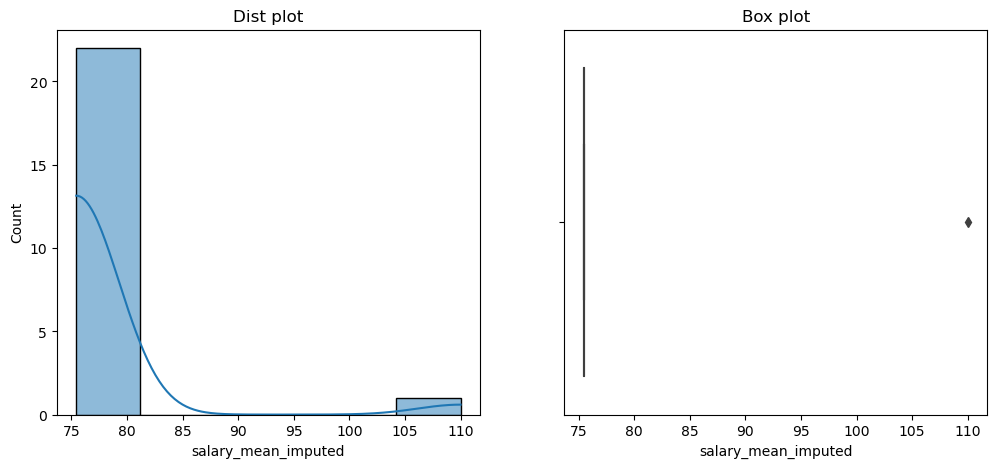

In [27]:

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['salary_mean_imputed'],kde=True)
plt.title("Dist plot")



plt.subplot(1,2,2)
sns.boxplot(data=df,x='salary_mean_imputed')
plt.title("Box plot")
plt.show()

In [28]:
#capping>> replacing outlier with the nearest values that is outlier

In [33]:
lower_cap=df['salary'].quantile(0.05) # lower cap as 5th percentile
upper_cap=df['salary'].quantile(0.95)

In [34]:
upper_cap

109.1

In [35]:
lower_cap

40.5

In [36]:
df['salary_capped']=np.where(df['salary']<lower_cap,lower_cap,
np.where(df['salary']>upper_cap,upper_cap,df['salary']))


In [38]:
df

,salary,salary_mean_imputed,salary_capped
0,11,75.434783,40.5
1,40,75.434783,40.5
2,45,75.434783,45.0
3,68,75.434783,68.0
4,65,75.434783,65.0
5,68,75.434783,68.0
6,78,75.434783,78.0
7,90,75.434783,90.0
8,57,75.434783,57.0
9,74,75.434783,74.0


In [39]:
df['salary_capped']

0      40.5
1      40.5
2      45.0
3      68.0
4      65.0
5      68.0
6      78.0
7      90.0
8      57.0
9      74.0
10     91.0
11     92.0
12     88.0
13     68.0
14     57.0
15     48.0
16     99.0
17    101.0
18     68.0
19     77.0
20    109.1
21    100.0
22    109.1
Name: salary_capped, dtype: float64

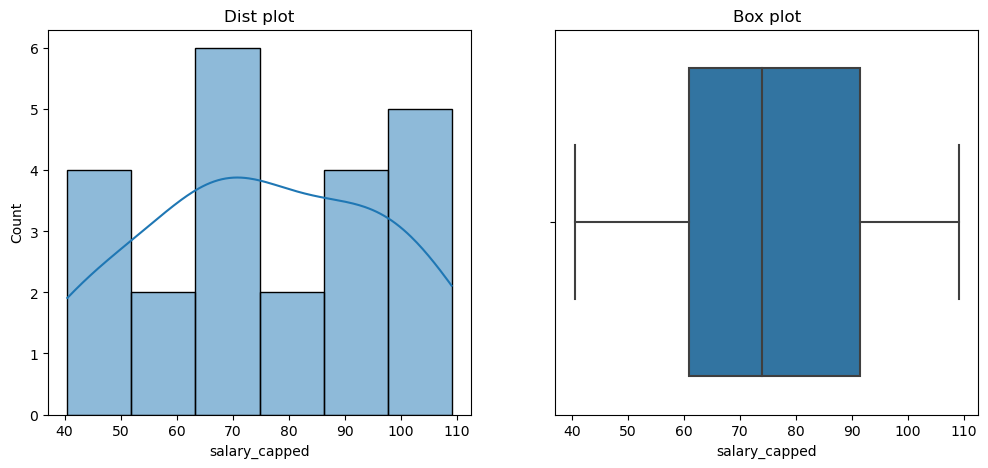

In [40]:

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['salary_capped'],kde=True)
plt.title("Dist plot")



plt.subplot(1,2,2)
sns.boxplot(data=df,x='salary_capped')
plt.title("Box plot")
plt.show()